In [1]:
import pandas as pd
import numpy as np


In [2]:
def cartesian_to_hyperspherical(vector): #for 1 sample for now 
    #vector = vector.detach().cpu().numpy()
    r = np.linalg.norm(vector)
    dim = len(vector)
    angles = np.zeros(dim - 1)
    for i in range(dim - 1):
        if vector[i:].any() != 0: 
            angles[i] = np.arctan2(np.linalg.norm(vector[(i+1):]), vector[i])
        else: 
            angles[i] == 0 
    return r, angles

def hyperspherical_to_cartesian(r, angles):
    dim = len(angles) + 1
    cart = np.zeros(dim)

    for i in range(dim):
        coord = r
        for j in range(i):
            coord *= np.sin(angles[j])
        if i < dim - 1:
            coord *= np.cos(angles[i])
        cart[i] = coord

    return cart

In [26]:
vector = np.array( [1/4, 1/2, 1/4, 1/3,1/4, 1/4, 1/4, 1/4,1/4, 1/4, 1/4, 1/3])
r, angles = cartesian_to_hyperspherical(vector)
print(r)
print(angles)


1.0172129679778086
[1.32248279 1.03898823 1.27220495 1.14791316 1.22650851 1.20406227
 1.17655195 1.14172648 1.09561948 1.03037683 0.92729522]


In [27]:
r_vector = hyperspherical_to_cartesian(r, angles)
print(r_vector)

[0.25       0.5        0.25       0.33333333 0.25       0.25
 0.25       0.25       0.25       0.25       0.25       0.33333333]


In [ ]:
vector = np.ones((1024,)) #perfecly flat vector
vector = vector / np.linalg.norm(vector)
r, angles = cartesian_to_hyperspherical2(vector)
print(r)
print(angles)

1.0
[1.53954124 1.53952596 1.53951066 ... 1.04719755 0.95531662 0.78539816]


In [11]:
np.pi/2

1.5707963267948966

In [ ]:
r = 1
angles = [np.pi/2, np.pi/2]  # should map to [0, 1, 0]
print(hyperspherical_to_cartesian(r, angles))

In [1]:
source_dataset_path = "datasets/trend.parquet" 
target_dataset_path = "datasets/sine.parquet" 
next_dataset_path = "datasets/exp.parquet" 
multiple = True
model_type="moment"
method="mean"
num_samples=20
alpha=1.0
output_dir="results"
device="cpu"

In [ ]:
source_dataset_path = "datasets/trend.parquet" 
target_dataset_path = "datasets/sine.parquet" 
next_dataset_path = "datasets/exp.parquet" 

In [11]:
import torch

In [13]:
def cartesian_to_hyperspherical(vector): #for 1 sample for now 
    
    if isinstance(vector, torch.Tensor):
        vector = vector.detach().cpu().numpy()
        
    r = np.linalg.norm(vector)
    vector = vector / r #normalization
    dim = len(vector)
    angles = np.zeros(dim - 1)
    
    if dim == 2:
        angles[0] = np.arctan2(vector[1], vector [0])
        
    elif dim == 3:
        angles[0] = np.arccos(vector[2]/r)
        angles[1] = np.sign(vector[1]) * np.arccos(vector[0]/np.linalg.norm(vector[:-1]))
    
    else: 
        for i in range(dim - 1):
            if vector[i:].any() != 0: 
                angles[i] = np.arctan2(np.linalg.norm(vector[(i+1):]), vector[i])
            else: 
                angles[i] == 0 
    return r, angles

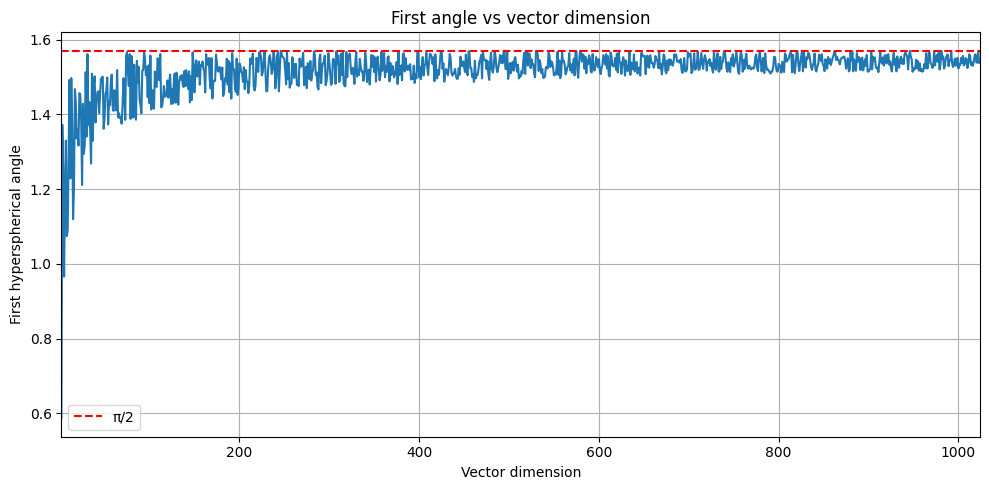

In [36]:
import numpy as np
import matplotlib.pyplot as plt

indices = np.arange(2, 1024, 1)
results = []

for ind in indices:
    vec = np.random.uniform(0, 1, size=ind)
    r, angles = cartesian_to_hyperspherical(vec)
    results.append(angles[0])

# Plot with x=indices
plt.figure(figsize=(10, 5))
plt.plot(indices, results, linestyle='-')

# Add horizontal line at pi/2
plt.axhline(y=np.pi / 2, color='r', linestyle='--', label='π/2')

# Set x-axis limits
plt.xlim(2, 1024)

# Add labels and legend
plt.xlabel("Vector dimension")
plt.ylabel("First hyperspherical angle")
plt.title("First angle vs vector dimension")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


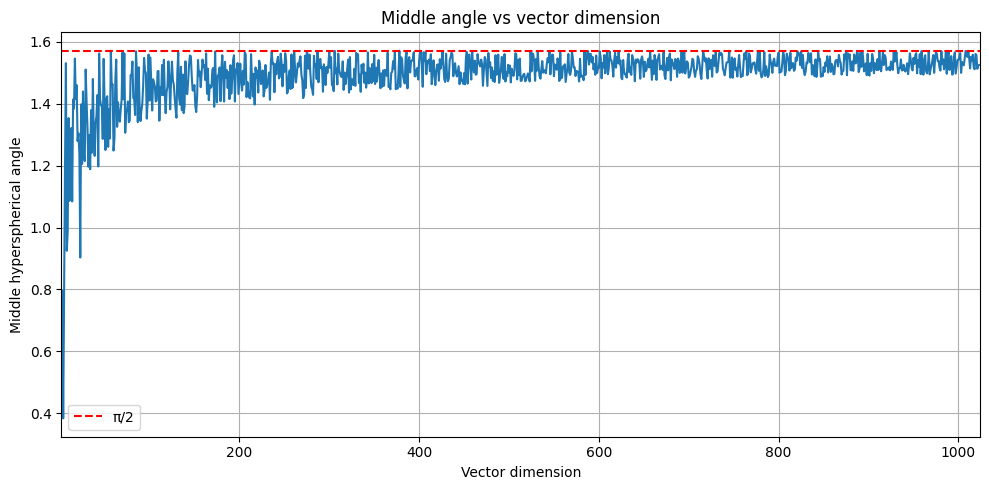

In [37]:
import numpy as np
import matplotlib.pyplot as plt

indices = np.arange(2, 1024, 1)
results = []

for ind in indices:
    vec = np.random.uniform(0, 1, size=ind)
    r, angles = cartesian_to_hyperspherical(vec)
    if ind != 2:
        results.append(angles[int(ind/2)])
    else:
        results.append(angles[0])

# Plot with x=indices
plt.figure(figsize=(10, 5))
plt.plot(indices, results, linestyle='-')

# Add horizontal line at pi/2
plt.axhline(y=np.pi / 2, color='r', linestyle='--', label='π/2')

# Set x-axis limits
plt.xlim(2, 1024)

# Add labels and legend
plt.xlabel("Vector dimension")
plt.ylabel("Middle hyperspherical angle")
plt.title("Middle angle vs vector dimension")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

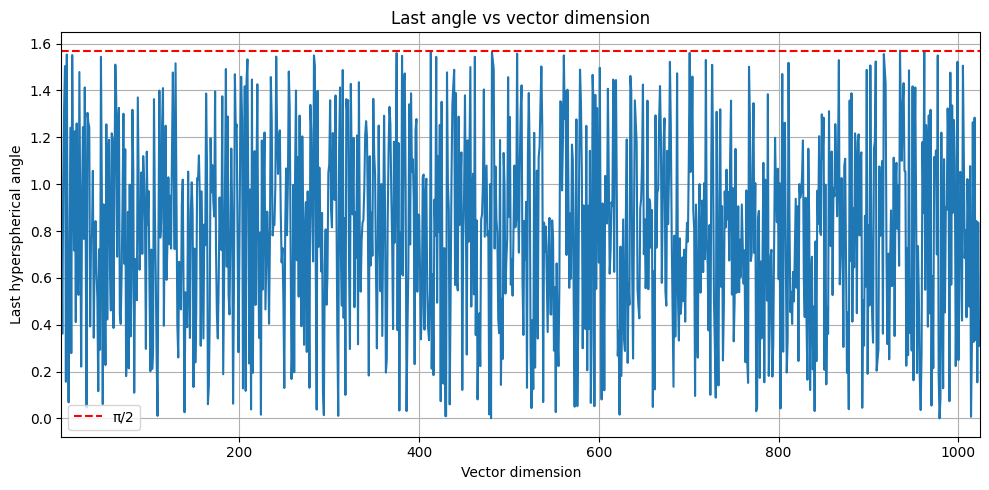

In [38]:
import numpy as np
import matplotlib.pyplot as plt

indices = np.arange(2, 1024, 1)
results = []

for ind in indices:
    vec = np.random.uniform(0, 1, size=ind)
    r, angles = cartesian_to_hyperspherical(vec)
    results.append(angles[-1])

# Plot with x=indices
plt.figure(figsize=(10, 5))
plt.plot(indices, results, linestyle='-')

# Add horizontal line at pi/2
plt.axhline(y=np.pi / 2, color='r', linestyle='--', label='π/2')

# Set x-axis limits
plt.xlim(2, 1024)

# Add labels and legend
plt.xlabel("Vector dimension")
plt.ylabel("Last hyperspherical angle")
plt.title("Last angle vs vector dimension")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()